# Importing Libraries and Loading Dataset

---



In [1]:
!pip install xgboost

In [2]:
!pip install imbalanced-learn --user

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import scipy.stats as stats
import statsmodels.api as sm

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report
)
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

In [7]:
from xgboost import XGBClassifier

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')

In [11]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [13]:
data.shape

(25480, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [16]:
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV25480,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [17]:
print(data.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
df= data.copy()

In [20]:
df.shape

(25480, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [22]:
df= df.drop('case_id', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [24]:
for cols in df.columns:
  if df[cols].dtypes=='object':
    df[cols]= df[cols].astype('category')
  else:
    continue

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB
None


In [25]:
df.loc[df['no_of_employees']<0].shape

(33, 11)

In [26]:
df['no_of_employees']= df['no_of_employees'].abs()

In [27]:
df['no_of_employees'].min()

11

In [28]:
num_cols= df.select_dtypes(include=('int64', 'float64')).columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [29]:
cat_cols= df.select_dtypes(include='category').columns
cat_cols

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [30]:
for cols in cat_cols:
  a= df[cols].value_counts()
  print(a)
  print('.'*40)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
........................................
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
........................................
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
........................................
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
........................................
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
........................................
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
........................................
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
........

# Univariate Bivariate Multivariate Analysis

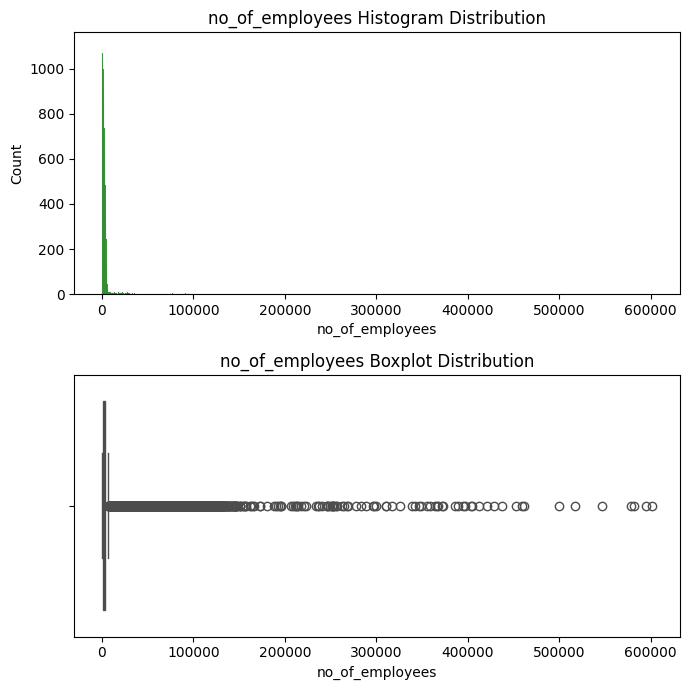

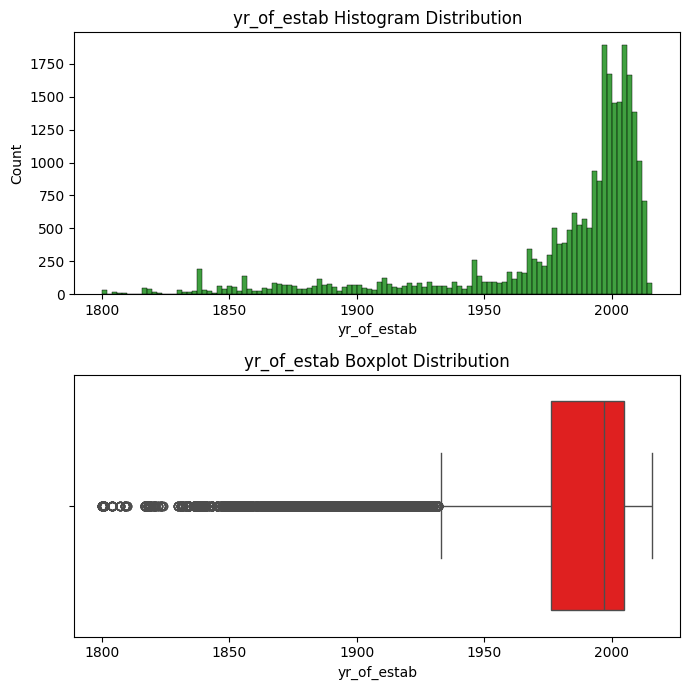

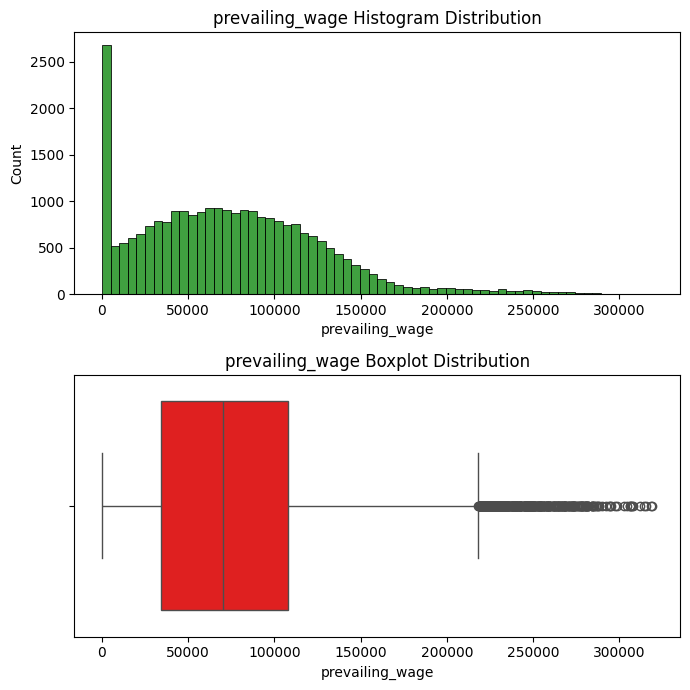

In [31]:
for cols in num_cols:
  plt.figure(figsize=(7,7))
  plt.subplot(2,1,1)
  plt.title(f'{cols} Histogram Distribution')
  sns.histplot(data= df[cols], color='Green')
  plt.subplot(2,1,2)
  plt.title(f'{cols} Boxplot Distribution')
  sns.boxplot(data= df[cols], color='Red', orient= 'h')
  plt.tight_layout()
  plt.show()

In [32]:
df['no_of_employees'].nunique()

7105

In [33]:
df['yr_of_estab'].nunique()

199

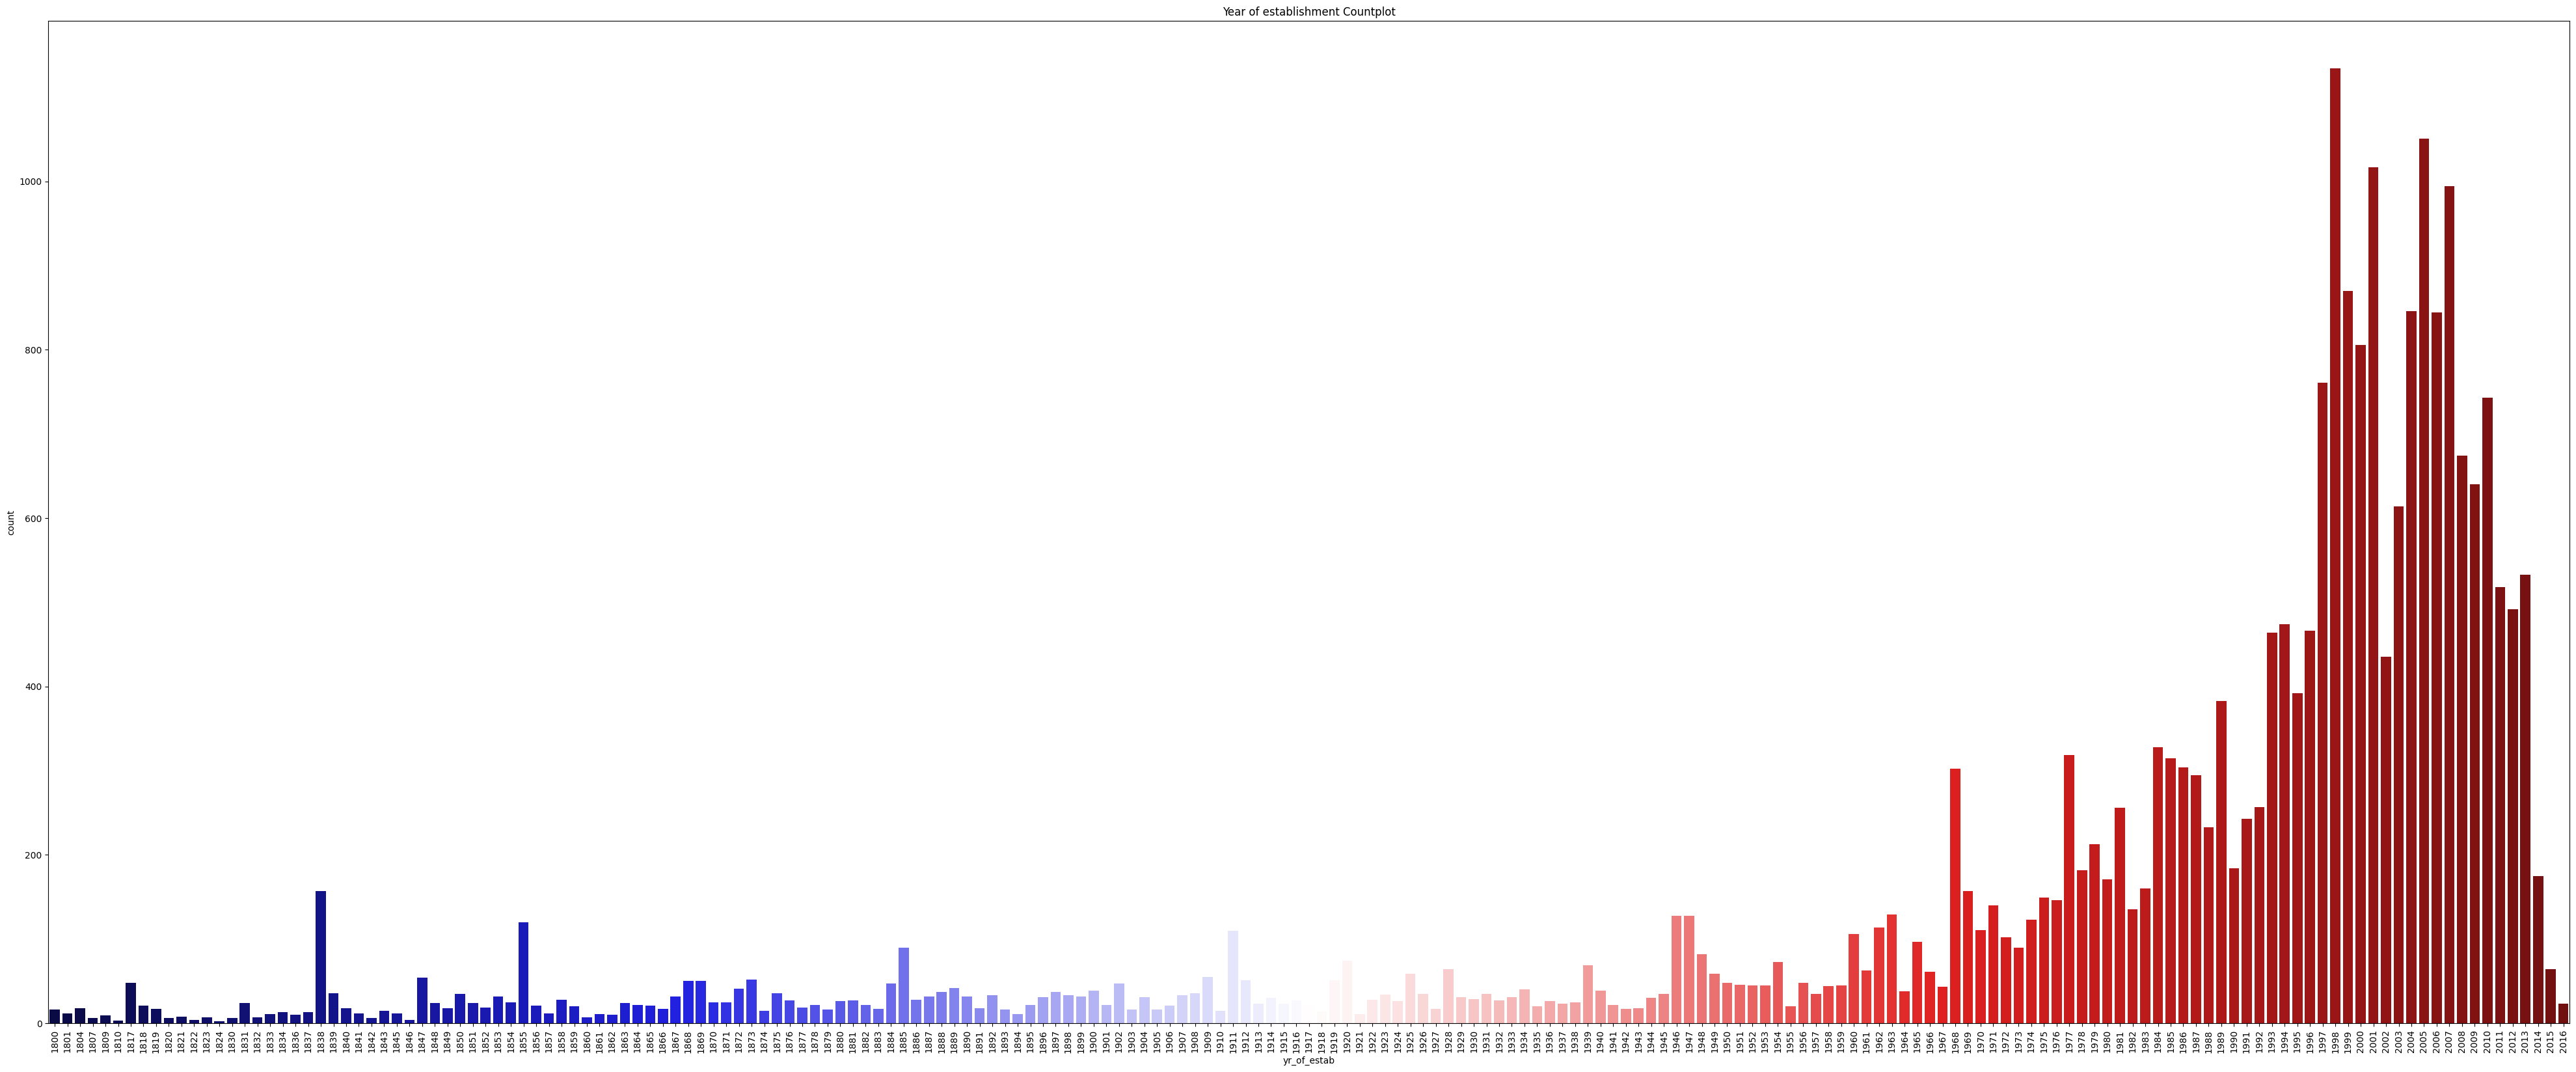

In [34]:
plt.figure(figsize=(50,20))
plt.title('Year of establishment Countplot')
plt.xticks(rotation= 90)
sns.countplot(data=df, x= 'yr_of_estab', palette='seismic')
plt.show()

In [35]:
df['prevailing_wage'].median()

70308.20999999999

In [36]:
df.groupby('unit_of_wage')['prevailing_wage'].median()

,prevailing_wage
unit_of_wage,
Hour,372.6523
Month,81826.0100
Week,85075.8200
Year,76174.5000


In [37]:
df.groupby('unit_of_wage')['prevailing_wage'].mean()

,prevailing_wage
unit_of_wage,
Hour,414.570513
Month,87592.864045
Week,85606.820515
Year,81228.077133


In [38]:
df.groupby('unit_of_wage')['prevailing_wage'].min()

,prevailing_wage
unit_of_wage,
Hour,2.1367
Month,1599.2800
Week,2183.2300
Year,100.0000


In [39]:
df.groupby('unit_of_wage')['prevailing_wage'].max()

,prevailing_wage
unit_of_wage,
Hour,999.9195
Month,264362.9500
Week,280175.9500
Year,319210.2700


In [40]:
df.groupby('unit_of_wage')['prevailing_wage'].count()

,prevailing_wage
unit_of_wage,
Hour,2157
Month,89
Week,272
Year,22962


In [41]:
df[df['prevailing_wage'] < 1600].groupby('unit_of_wage')['prevailing_wage'].count()

,prevailing_wage
unit_of_wage,
Hour,2157
Month,1
Week,0
Year,171


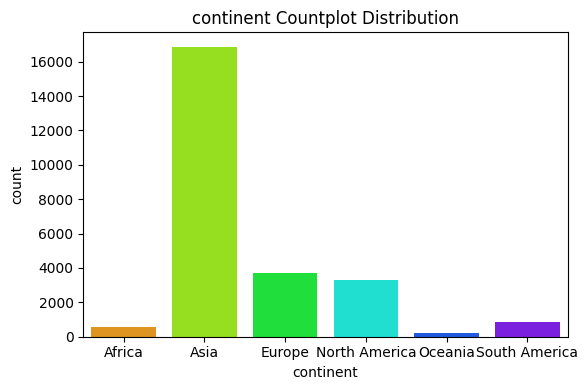

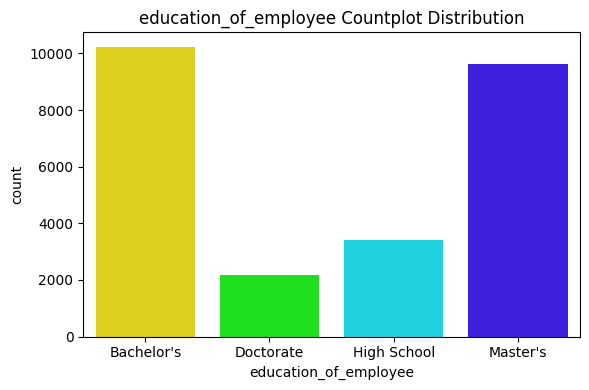

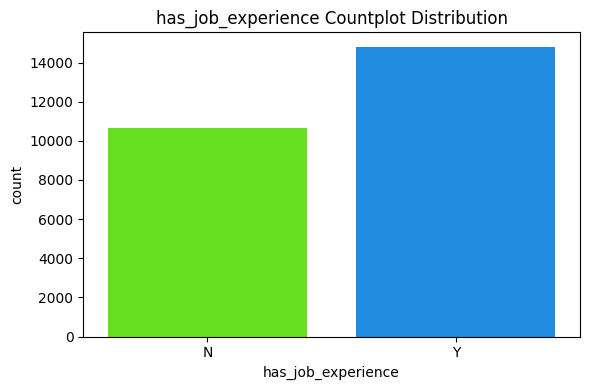

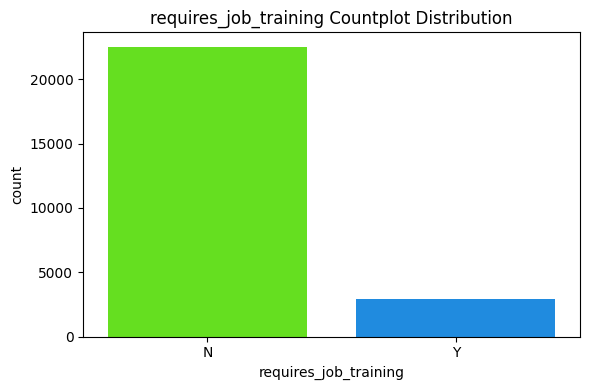

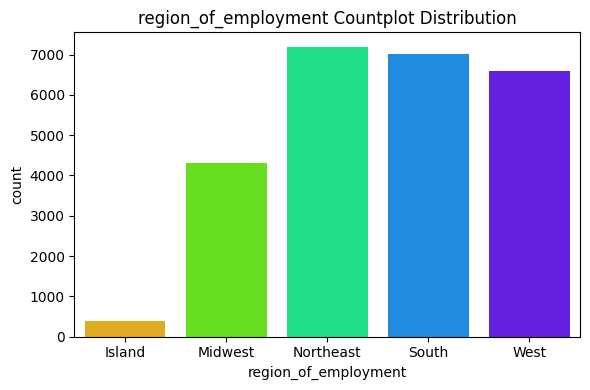

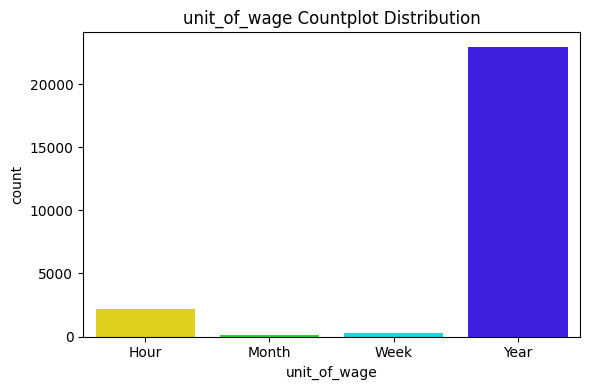

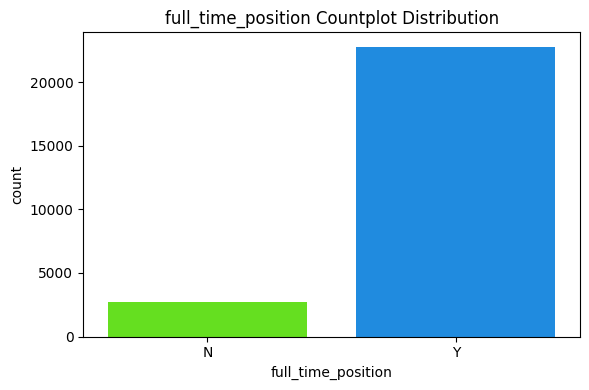

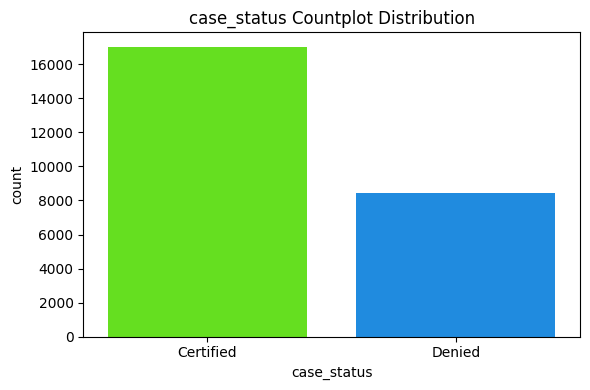

In [42]:
for cols in cat_cols:
  plt.figure(figsize=(6,4))
  plt.title(f'{cols} Countplot Distribution')
  sns.countplot(data=df, x= cols, palette='gist_rainbow')
  plt.tight_layout()
  plt.show()

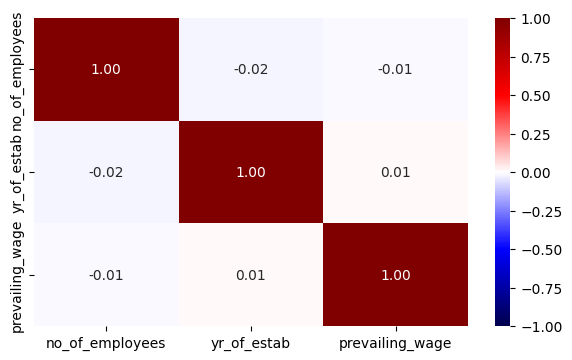

In [43]:
plt.figure(figsize=(7,4))
sns.heatmap(data[num_cols].corr(),
            vmin=-1,
            vmax=1,
            cmap='seismic',
            fmt= '.2f',
            annot= True)
plt.show()

<Figure size 700x400 with 0 Axes>

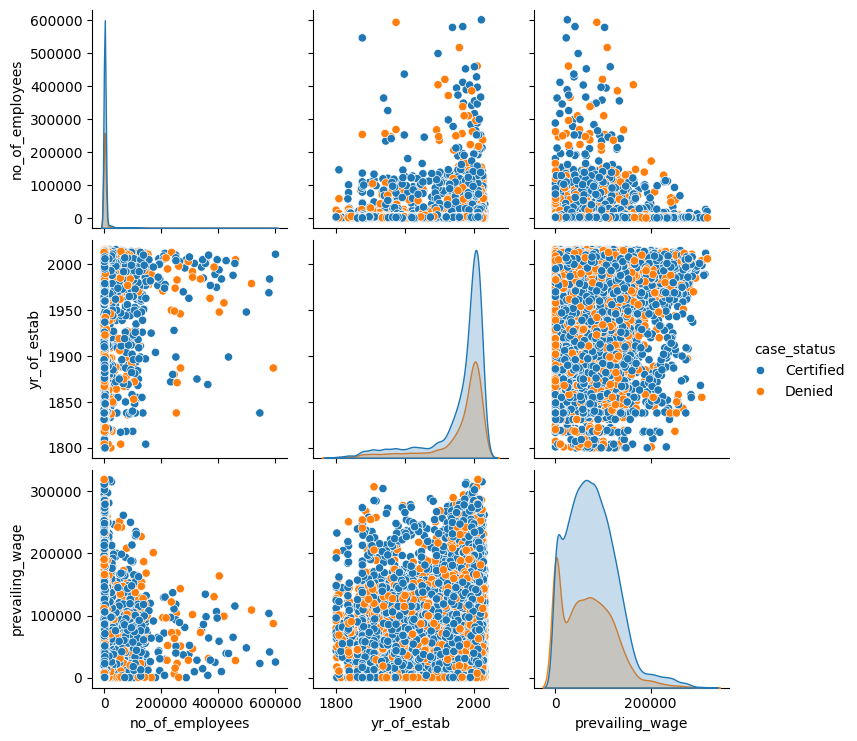

In [44]:
plt.figure(figsize=(7,4))
sns.pairplot(data= df, hue='case_status')
plt.show()

continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: proportion, dtype: float64


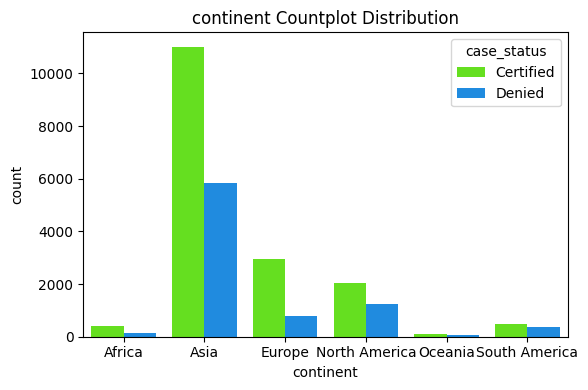

education_of_employee  case_status
Bachelor's             Certified      62.214188
                       Denied         37.785812
Doctorate              Certified      87.226277
                       Denied         12.773723
High School            Denied         65.964912
                       Certified      34.035088
Master's               Certified      78.627777
                       Denied         21.372223
Name: proportion, dtype: float64


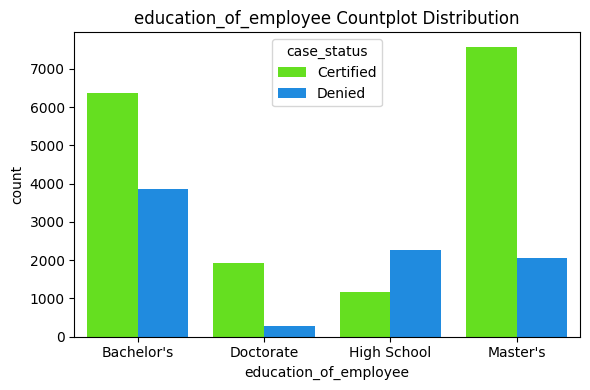

has_job_experience  case_status
N                   Certified      56.134108
                    Denied         43.865892
Y                   Certified      74.476422
                    Denied         25.523578
Name: proportion, dtype: float64


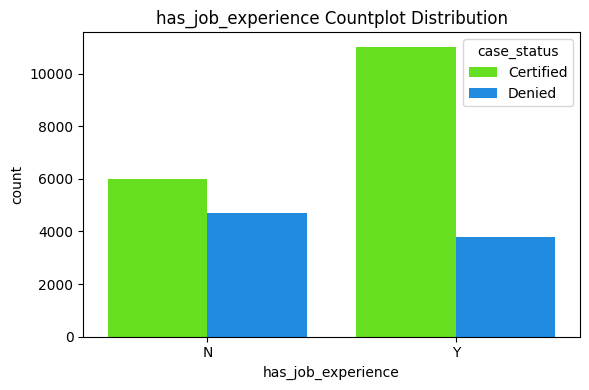

requires_job_training  case_status
N                      Certified      66.645949
                       Denied         33.354051
Y                      Certified      67.884941
                       Denied         32.115059
Name: proportion, dtype: float64


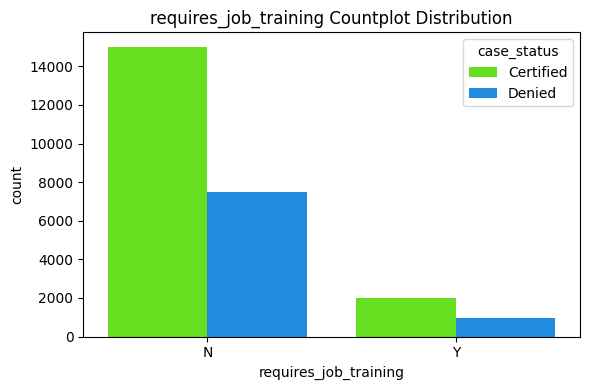

region_of_employment  case_status
Island                Certified      60.266667
                      Denied         39.733333
Midwest               Certified      75.528210
                      Denied         24.471790
Northeast             Certified      62.904795
                      Denied         37.095205
South                 Certified      70.015676
                      Denied         29.984324
West                  Certified      62.253265
                      Denied         37.746735
Name: proportion, dtype: float64


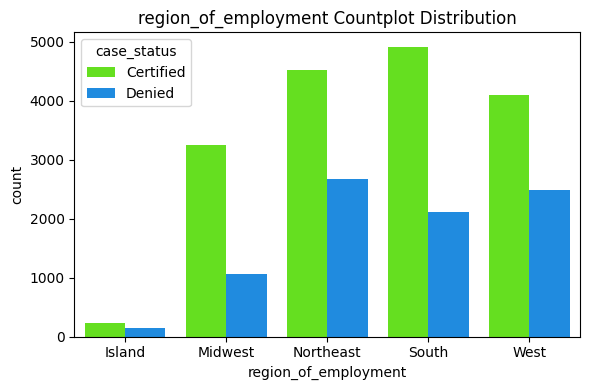

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: proportion, dtype: float64


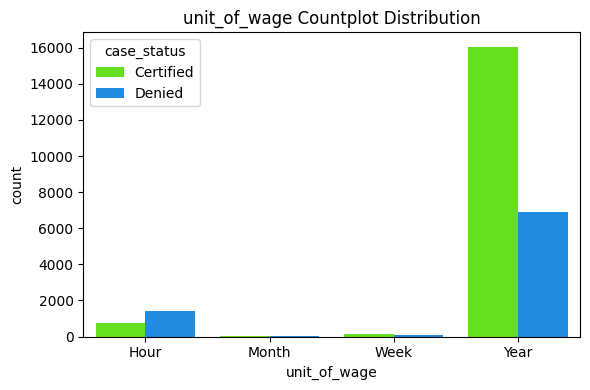

full_time_position  case_status
N                   Certified      68.526044
                    Denied         31.473956
Y                   Certified      66.583235
                    Denied         33.416765
Name: proportion, dtype: float64


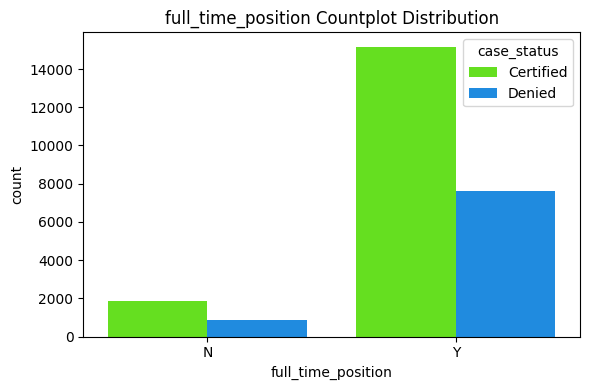

case_status
Certified      0.0
Denied         0.0
Name: proportion, dtype: float64


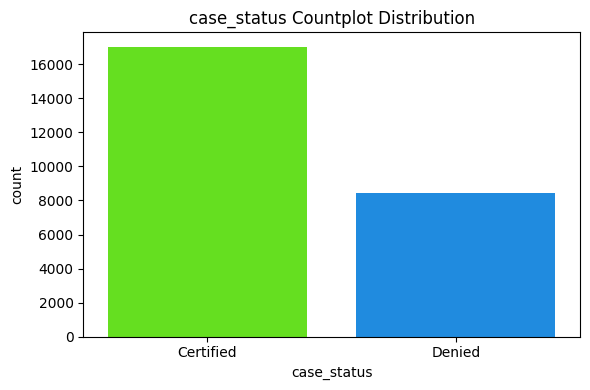

In [45]:
for cols in cat_cols:
  cat_count= df.groupby(cols)['case_status'].value_counts(normalize=True)*100
  print(cat_count)
  plt.figure(figsize=(6,4))
  plt.title(f'{cols} Countplot Distribution')
  sns.countplot(data=df, x= cols, palette='gist_rainbow', hue='case_status')
  plt.tight_layout()
  plt.show()

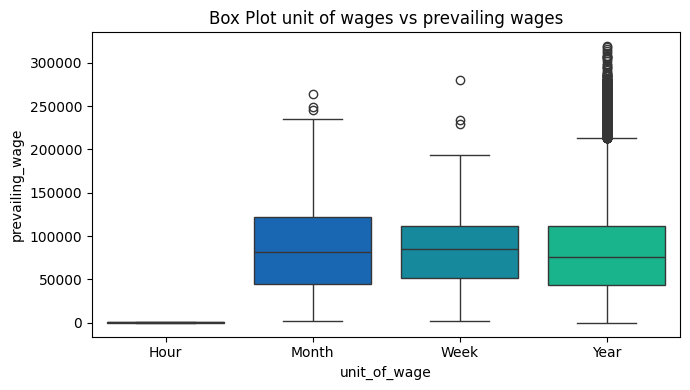

In [46]:
plt.figure(figsize=(7,4))
plt.title('Box Plot unit of wages vs prevailing wages')
sns.boxplot(data= df, x='unit_of_wage', y= 'prevailing_wage', legend= True, palette='winter')
plt.tight_layout()
plt.show()

In [47]:
def bar_and_box_plot(data, X, Y):
  plt.figure(figsize=(10,10))
  plt.subplot(3,1,1)
  plt.title(f'{X} vs {Y} Bar Plot')
  plt.legend(loc='best')
  sns.barplot(data=data, x= X, y= Y, hue= 'case_status', legend= True, palette= 'gist_rainbow')
  plt.subplot(3,1,2)
  plt.title(f'{X} vs {Y} Box Plot')
  plt.legend(loc='best')
  sns.boxplot(data=data, x= X, y= Y, legend= True, palette= 'seismic')
  plt.subplot(3,1,3)
  plt.title(f'{X} vs {Y} Box Plot')
  plt.legend(loc='best')
  sns.boxplot(data=data, x= X, y= Y, hue= 'case_status', legend= True, palette= 'PRGn')
  plt.tight_layout()
  plt.show()

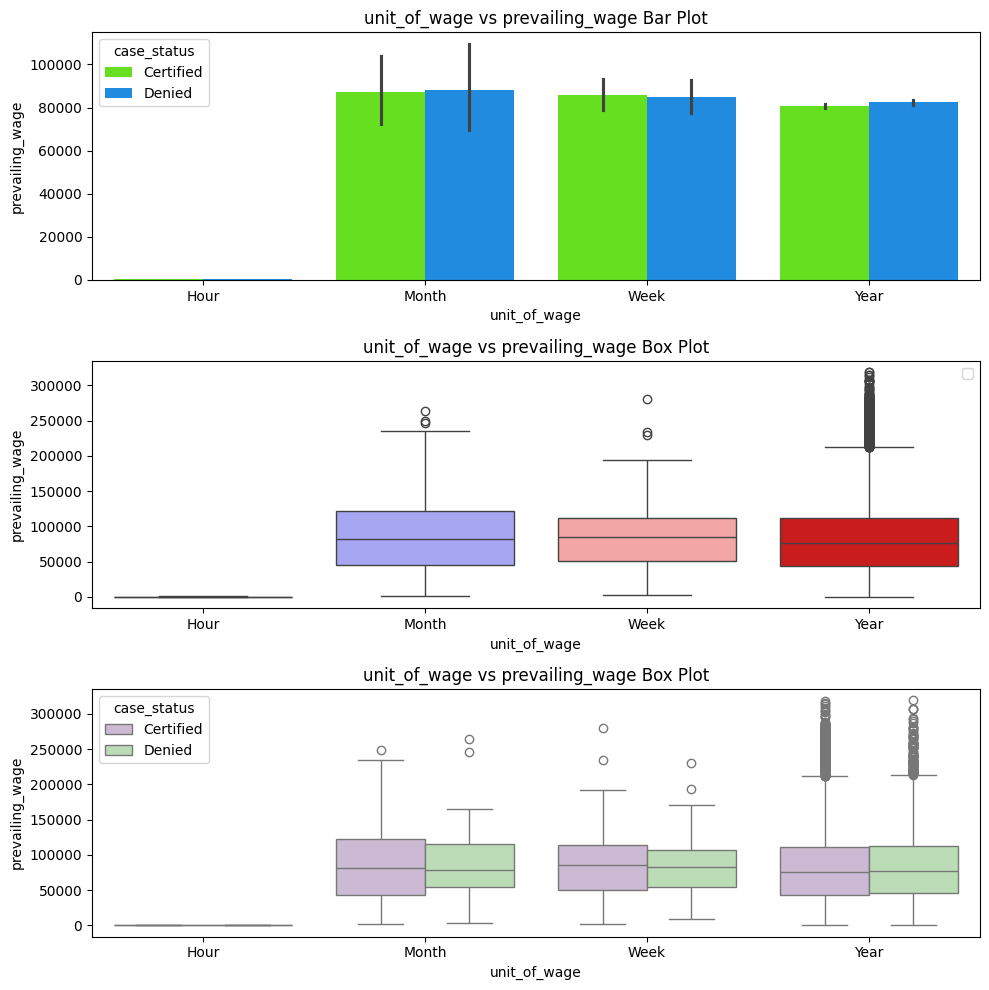

In [48]:
bar_and_box_plot(df, 'unit_of_wage', 'prevailing_wage')

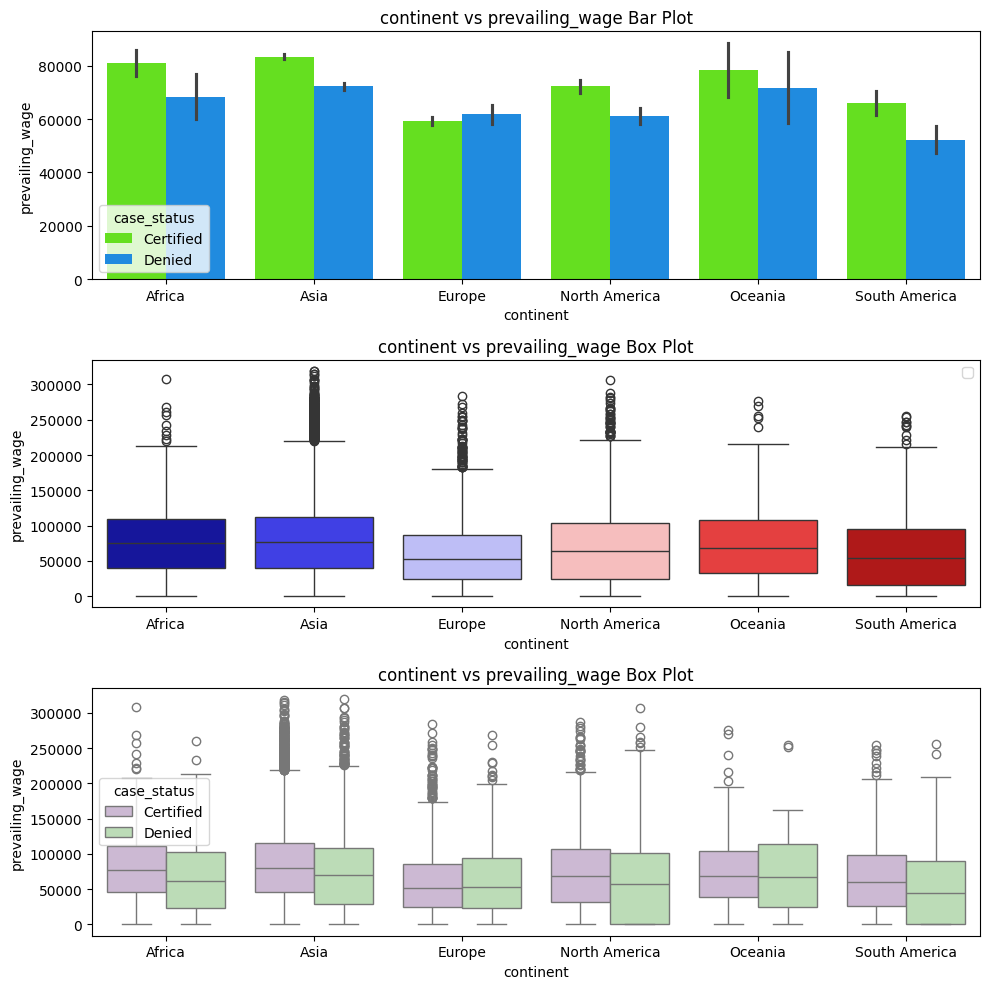

In [49]:
bar_and_box_plot(df, 'continent', 'prevailing_wage')

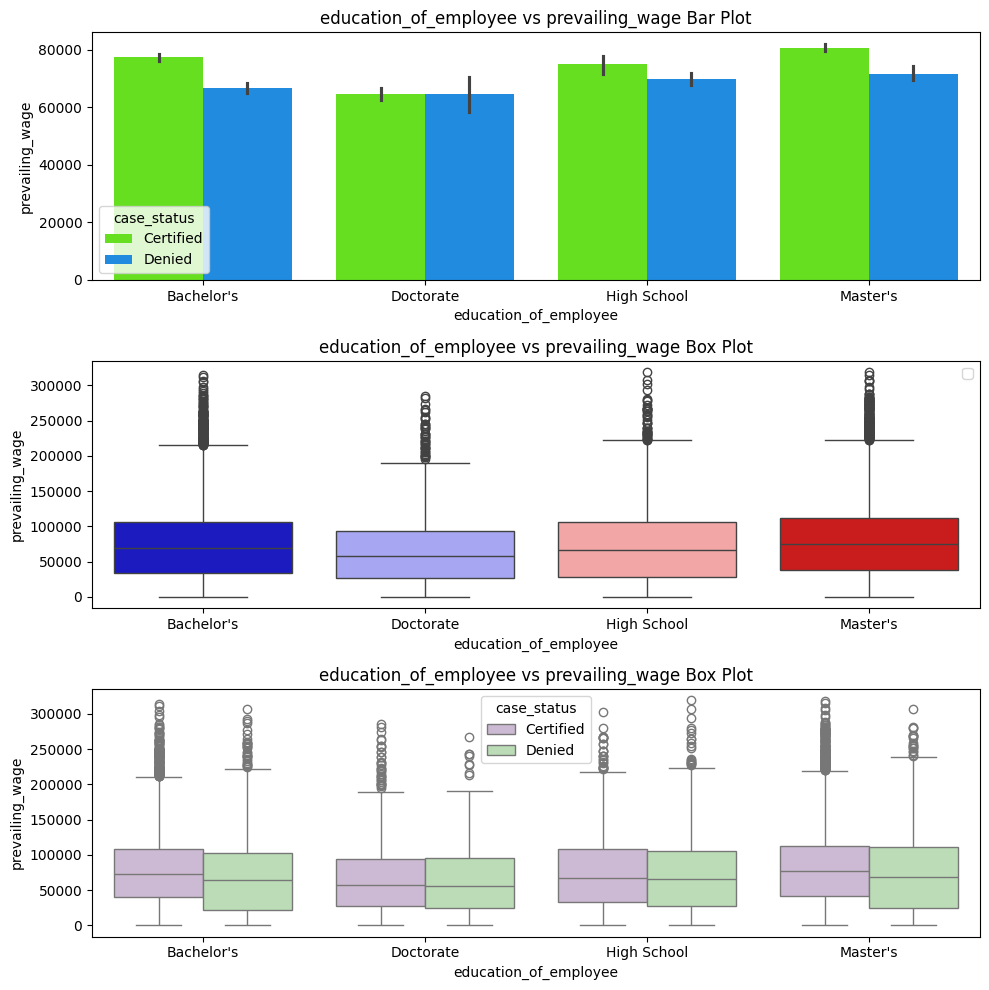

In [50]:
bar_and_box_plot(df, 'education_of_employee', 'prevailing_wage')

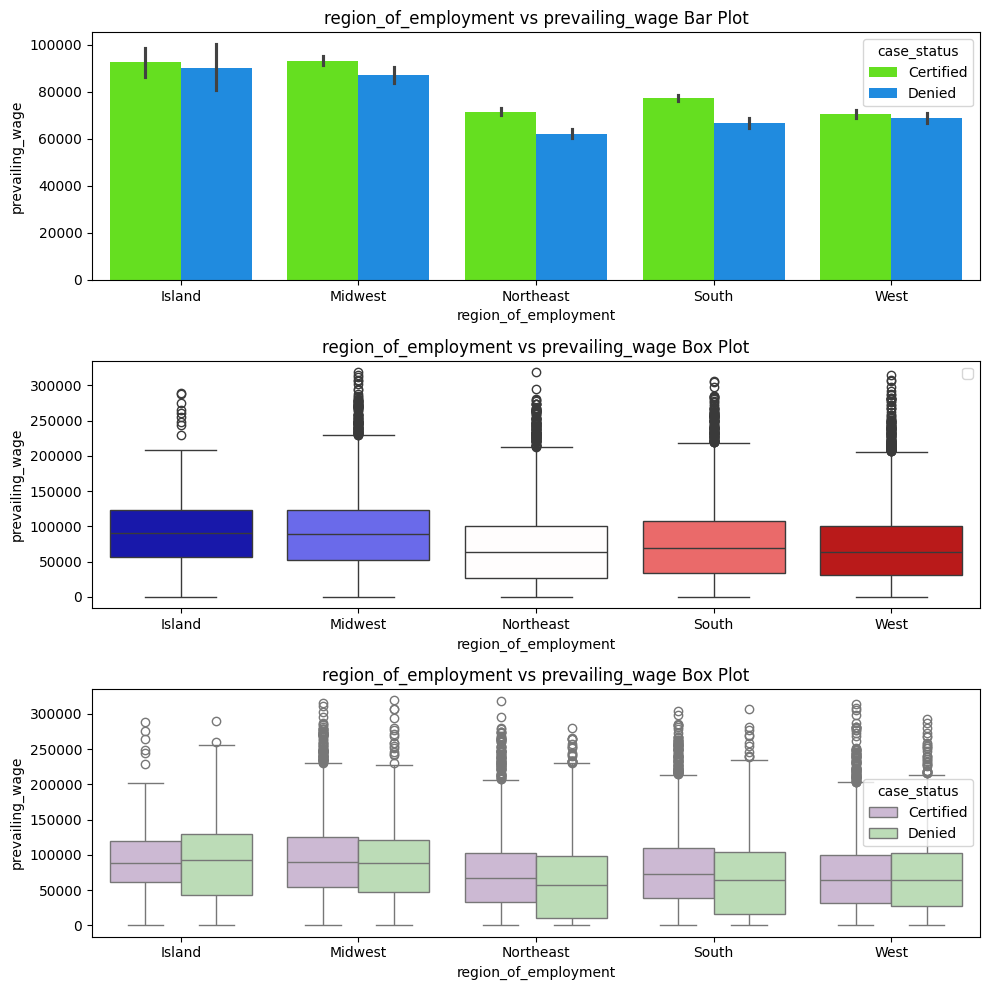

In [51]:
bar_and_box_plot(df, 'region_of_employment', 'prevailing_wage')

# Data Preparation for Model Building

In [52]:
case_status_v2={
    'case_status':{
        'Certified': 1,
        'Denied': 0
    }
}

In [53]:
case_status_v2

{'case_status': {'Certified': 1, 'Denied': 0}}

In [54]:
df= df.replace(case_status_v2)

In [55]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [56]:
X= df.drop(['case_status'], axis=1)
y= df['case_status']

In [57]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y


In [58]:
y= y.astype(float)

In [59]:
y.head()

,case_status
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [60]:
X_encoding= X.select_dtypes(include='category').columns.tolist()
X_encoding

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [61]:
X= pd.get_dummies(X, columns=X_encoding, drop_first=True).astype(float)

In [62]:
X.head().T

,0,1,2,3,4
no_of_employees,14513.0000,2412.00,44444.00,98.00,1082.00
yr_of_estab,2007.0000,2002.00,2008.00,1897.00,2005.00
prevailing_wage,592.2029,83425.65,122996.86,83434.03,149907.39
continent_Asia,1.0000,1.00,1.00,1.00,0.00
continent_Europe,0.0000,0.00,0.00,0.00,0.00
continent_North America,0.0000,0.00,0.00,0.00,0.00
continent_Oceania,0.0000,0.00,0.00,0.00,0.00
continent_South America,0.0000,0.00,0.00,0.00,0.00
education_of_employee_Doctorate,0.0000,0.00,0.00,0.00,0.00
education_of_employee_High School,1.0000,0.00,0.00,0.00,0.00


# Data Split

In [63]:
X_Train, X_test, y_Train, y_test= train_test_split(X, y, test_size=0.2, random_state=42,shuffle= True, stratify= y)

In [64]:
y_Train.reset_index(inplace= True, drop=True)

In [65]:
print(f'Shape of total train data: {X_Train.shape}')
print(f'Shape of test data: {X_test.shape}')
print(f'Percentage of classes in total training data: {y_Train.value_counts(normalize= True)}')
print(f'Percentage of classes in testing data: {y_test.value_counts(normalize= True)}')

Shape of total train data: (20384, 21)
Shape of test data: (5096, 21)
Percentage of classes in total training data: case_status
1.0    0.667877
0.0    0.332123
Name: proportion, dtype: float64
Percentage of classes in testing data: case_status
1.0    0.667975
0.0    0.332025
Name: proportion, dtype: float64


In [66]:
X_train, X_val, y_train, y_val= train_test_split(X_Train, y_Train, test_size=0.25, random_state= 42, shuffle = True, stratify= y_Train)

In [67]:
y_train.reset_index(inplace= True, drop=True)

In [68]:
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of validation data: {X_val.shape}')
print(f'Percentage of classes in training data: {y_train.value_counts(normalize= True)}')
print(f'Percentage of classes in validation data: {y_val.value_counts(normalize= True)}')

Shape of train data: (15288, 21)
Shape of validation data: (5096, 21)
Percentage of classes in training data: case_status
1.0    0.667909
0.0    0.332091
Name: proportion, dtype: float64
Percentage of classes in validation data: case_status
1.0    0.667779
0.0    0.332221
Name: proportion, dtype: float64


In [69]:
def model_performance(model, predictors, target):
  pred= model.predict(predictors)

  acc= accuracy_score(target, pred)
  recall= recall_score(target, pred)
  precision= precision_score(target, pred)
  f1= f1_score(target, pred)

  df_perf= pd.DataFrame(
      {
          'Accuracy': acc,
          'Recall': recall,
          'Precision': precision,
          'F1_score': f1
      },
      index=[0],
  )
  return df_perf

In [70]:
def plot_confusion_matrix(model, predictors, target):
  y_pred= model.predict(predictors)
  cm= confusion_matrix(target, y_pred)

  labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                       for item in cm.flatten()
                       ]).reshape(2, 2)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot= labels, fmt='', cmap='seismic')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Original Data

## Decision Tree

In [71]:
dt_model= DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [72]:
y_train_predict= dt_model.predict(X_train)
# y_val_predict= dt_model.predict(X_val)

In [73]:
model_score= dt_model.score(X_train, y_train)
print(model_score)

1.0


In [74]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5077
         1.0       1.00      1.00      1.00     10211

    accuracy                           1.00     15288
   macro avg       1.00      1.00      1.00     15288
weighted avg       1.00      1.00      1.00     15288



In [75]:
# print(classification_report(y_val, y_val_predict))

In [76]:
model_performance(dt_model, X_train, y_train)

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [77]:
# model_performance(dt_model, X_val, y_val)

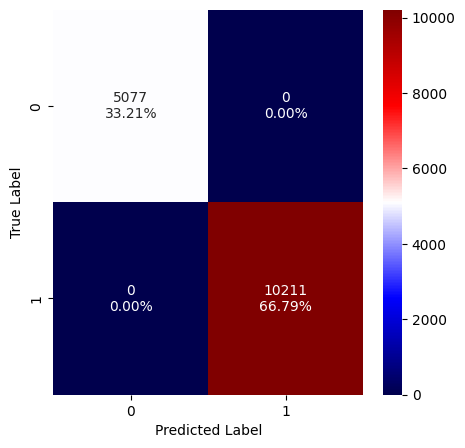

In [78]:
plot_confusion_matrix(dt_model, X_train, y_train)

In [79]:
# plot_confusion_matrix(dt_model, X_val, y_val)

In [80]:
# feature_names= list(X_train.columns)
# feature_names

In [81]:
# plt.figure(figsize=(30,30))
# tree.plot_tree(dt_model, feature_names=feature_names, filled= True, fontsize=9, node_ids= True, class_names= True)
# plt.show()

In [82]:
# print(pd.DataFrame(dt_model.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp', ascending= False))

## Random Forest

In [83]:
rf_model= RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [84]:
y_train_predict= rf_model.predict(X_train)
# y_val_predict= rf_model.predict(X_val)

In [85]:
model_score= rf_model.score(X_train, y_train)
print(model_score)

0.9999345892203035


In [86]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5077
         1.0       1.00      1.00      1.00     10211

    accuracy                           1.00     15288
   macro avg       1.00      1.00      1.00     15288
weighted avg       1.00      1.00      1.00     15288



In [87]:
# print(classification_report(y_val, y_val_predict))

In [88]:
model_performance(rf_model, X_train, y_train)

,Accuracy,Recall,Precision,F1_score
0,0.999935,1.0,0.999902,0.999951


In [89]:
# model_performance(rf_model, X_val, y_val)

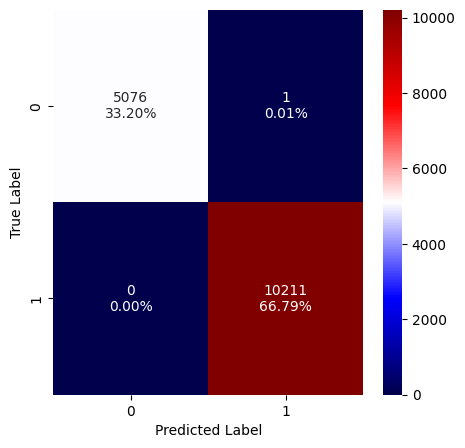

In [90]:
plot_confusion_matrix(rf_model, X_train, y_train)

In [91]:
# plot_confusion_matrix(rf_model, X_val, y_val)

In [92]:
# print(pd.DataFrame(rf_model.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp', ascending= False))

## Bagging

In [93]:
bg_model= BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42)
bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  random_state=42)

In [94]:
y_train_predict= bg_model.predict(X_train)
# y_val_predict= bg_model.predict(X_val)

In [95]:
model_score= bg_model.score(X_train, y_train)
print(model_score)

0.984236002093145


In [96]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      5077
         1.0       0.99      0.98      0.99     10211

    accuracy                           0.98     15288
   macro avg       0.98      0.98      0.98     15288
weighted avg       0.98      0.98      0.98     15288



In [97]:
# print(classification_report(y_val, y_val_predict))

In [98]:
model_performance(bg_model, X_train, y_train)

,Accuracy,Recall,Precision,F1_score
0,0.984236,0.98482,0.99152,0.988159


In [99]:
# model_performance(bg_model, X_val, y_val)

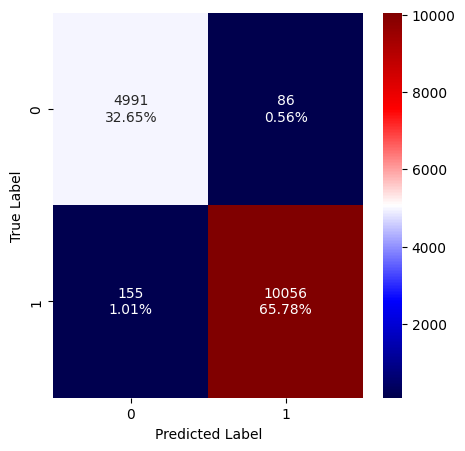

In [100]:
plot_confusion_matrix(bg_model, X_train, y_train)

In [101]:
# plot_confusion_matrix(bg_model, X_val, y_val)

## Ada Boost

In [102]:
ad_model= AdaBoostClassifier(random_state=42)
ad_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [103]:
y_train_predict= ad_model.predict(X_train)
# y_val_predict= ad_model.predict(X_val)

In [104]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.45      0.54      5077
         1.0       0.77      0.88      0.82     10211

    accuracy                           0.74     15288
   macro avg       0.71      0.67      0.68     15288
weighted avg       0.73      0.74      0.73     15288



In [105]:
# print(classification_report(y_val, y_val_predict))

In [106]:
model_score= ad_model.score(X_train, y_train)
print(model_score)

0.7414965986394558


In [107]:
model_performance(ad_model, X_train, y_train)

,Accuracy,Recall,Precision,F1_score
0,0.741497,0.884145,0.765279,0.820429


In [108]:
# model_performance(ad_model, X_val, y_val)

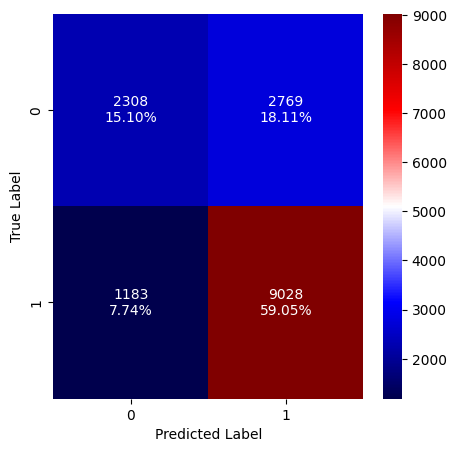

In [109]:
plot_confusion_matrix(ad_model, X_train, y_train)

In [110]:
# plot_confusion_matrix(ad_model, X_val, y_val)

In [111]:
# print(pd.DataFrame(ad_model.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp', ascending= False))

## XG Boost

In [112]:
xg_model= XGBClassifier(random_state=42, eval_metric= 'logloss')
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [113]:
y_train_predict= xg_model.predict(X_train)
# y_val_predict= xg_model.predict(X_val)

In [114]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76      5077
         1.0       0.86      0.94      0.90     10211

    accuracy                           0.85     15288
   macro avg       0.85      0.81      0.83     15288
weighted avg       0.85      0.85      0.85     15288



In [115]:
# print(classification_report(y_val, y_val_predict))

In [116]:
model_score= xg_model.score(X_train, y_train)
print(model_score)

0.8541993720565149


In [117]:
model_performance(xg_model, X_train, y_train)

,Accuracy,Recall,Precision,F1_score
0,0.854199,0.937812,0.857296,0.895749


In [118]:
# model_performance(xg_model, X_val, y_val)

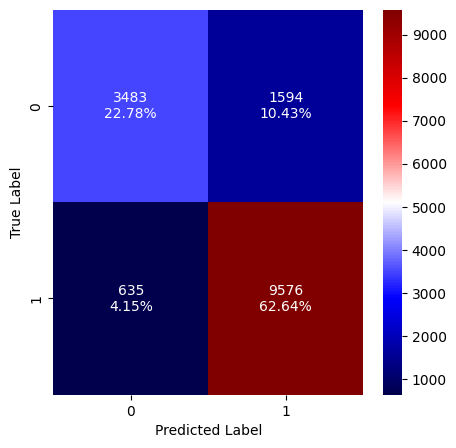

In [119]:
plot_confusion_matrix(xg_model, X_train, y_train)

In [120]:
# plot_confusion_matrix(xg_model, X_val, y_val)

In [121]:
# print(pd.DataFrame(xg_model.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp', ascending= False))

# Oversampling

In [122]:
sm= SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_train_over, y_train_over= sm.fit_resample(X_train, y_train)

In [123]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10211
Before Oversampling, counts of label 'Denied': 5077 

After Oversampling, counts of label 'Certified': 10211
After Oversampling, counts of label 'Denied': 10211 

After Oversampling, the shape of train_X: (20422, 21)
After Oversampling, the shape of train_y: (20422,) 



## Decision Tree OverSampled

In [124]:
dt_model_over= DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dt_model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [125]:
y_train_over_predict= dt_model_over.predict(X_train_over)
# y_val_predict= dt_model_over.predict(X_val)

In [126]:
model_score= dt_model_over.score(X_train_over, y_train_over)

In [127]:
print(model_score)

1.0


In [128]:
print(classification_report(y_train_over, y_train_over_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10211
         1.0       1.00      1.00      1.00     10211

    accuracy                           1.00     20422
   macro avg       1.00      1.00      1.00     20422
weighted avg       1.00      1.00      1.00     20422



In [129]:
# print(classification_report(y_val, y_val_predict))

In [130]:
model_performance(dt_model_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [131]:
# model_performance(dt_model_over, X_val, y_val)

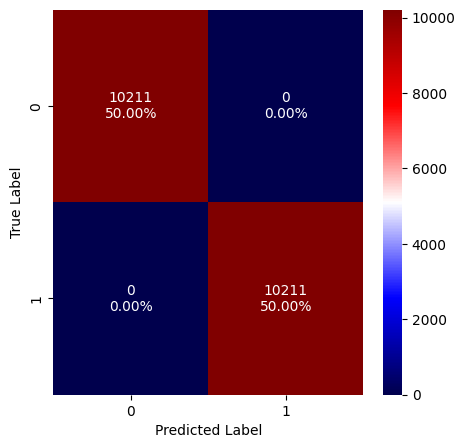

In [132]:
plot_confusion_matrix(dt_model_over, X_train_over, y_train_over)

In [133]:
# plot_confusion_matrix(dt_model_over, X_val, y_val)

## Random Forest OverSampled

In [134]:
rf_model_over= RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_over.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [135]:
model_score= rf_model_over.score(X_train_over, y_train_over)
print(model_score)

1.0


In [136]:
y_train_over_predict= rf_model_over.predict(X_train_over)
# y_val_predict= rf_model_over.predict(X_val)

In [137]:
print(classification_report(y_train_over, y_train_over_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10211
         1.0       1.00      1.00      1.00     10211

    accuracy                           1.00     20422
   macro avg       1.00      1.00      1.00     20422
weighted avg       1.00      1.00      1.00     20422



In [138]:
# print(classification_report(y_val, y_val_predict))

In [139]:
model_performance(rf_model_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [140]:
# model_performance(rf_model_over, X_val, y_val)

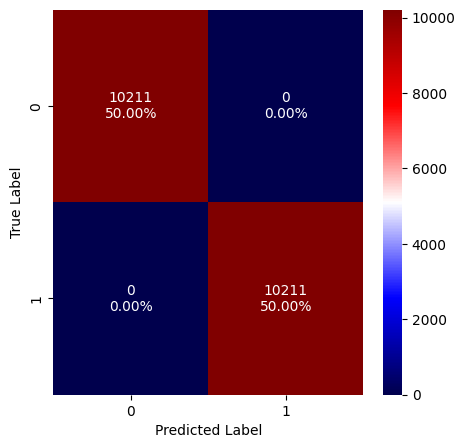

In [141]:
plot_confusion_matrix(rf_model_over, X_train_over, y_train_over)

In [142]:
# plot_confusion_matrix(rf_model_over, X_val, y_val)

## Bagging OverSampled

In [143]:
bg_model_over= BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42)
bg_model_over.fit(X_train_over, y_train_over)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  random_state=42)

In [144]:
model_score= bg_model_over.score(X_train_over, y_train_over)
print(model_score)

0.9882479678777789


In [145]:
y_train_over_predict= bg_model_over.predict(X_train_over)
# y_val_predict= bg_model_over.predict(X_val)

In [146]:
print(classification_report(y_train_over, y_train_over_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10211
         1.0       0.99      0.98      0.99     10211

    accuracy                           0.99     20422
   macro avg       0.99      0.99      0.99     20422
weighted avg       0.99      0.99      0.99     20422



In [147]:
# print(classification_report(y_val, y_val_predict))

In [148]:
model_performance(bg_model_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,0.988248,0.984526,0.991909,0.988204


In [149]:
# model_performance(bg_model_over, X_val, y_val)

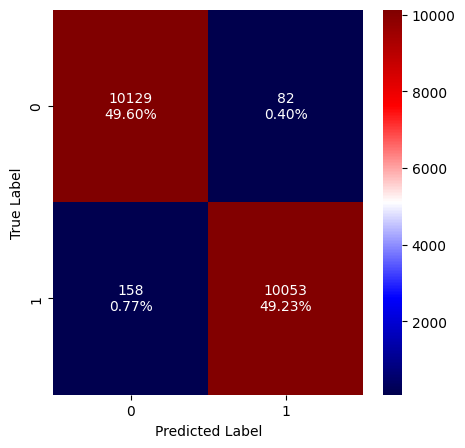

In [150]:
plot_confusion_matrix(bg_model_over, X_train_over, y_train_over)

In [151]:
# plot_confusion_matrix(bg_model_over, X_val, y_val)

## AdaBoost OverSampled

In [152]:
ad_model_over= AdaBoostClassifier(random_state=42)
ad_model_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=42)

In [153]:
model_score= ad_model_over.score(X_train_over, y_train_over)
print(model_score)

0.796445010283028


In [154]:
y_train_over_predict= ad_model_over.predict(X_train_over)
# y_val= ad_model_over.predict(X_val)

In [155]:
print(classification_report(y_train_over, y_train_over_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79     10211
         1.0       0.78      0.83      0.80     10211

    accuracy                           0.80     20422
   macro avg       0.80      0.80      0.80     20422
weighted avg       0.80      0.80      0.80     20422



In [156]:
# print(classification_report(y_val, y_val_predict))

In [157]:
model_performance(ad_model_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,0.796445,0.83175,0.776894,0.803386


In [158]:
# model_performance(ad_model_over, X_val, y_val)

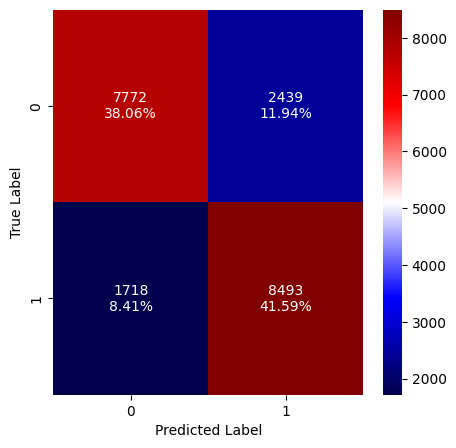

In [159]:
plot_confusion_matrix(ad_model_over, X_train_over, y_train_over)

In [160]:
# plot_confusion_matrix(ad_model_over, X_val, y_val)

## XG Boosting OverSampled

In [161]:
xg_model_over= XGBClassifier(random_state=42)
xg_model_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [162]:
model_score= xg_model_over.score(X_train_over, y_train_over)

In [163]:
print(model_score)

0.8829203799823719


In [164]:
y_train_over_predict= xg_model_over.predict(X_train_over)
# y_val_predict= xg_model_over.predict(X_val)

In [165]:
print(classification_report(y_train_over, y_train_over_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88     10211
         1.0       0.85      0.93      0.89     10211

    accuracy                           0.88     20422
   macro avg       0.89      0.88      0.88     20422
weighted avg       0.89      0.88      0.88     20422



In [166]:
# print(classification_report(y_val, y_val_predict))

In [167]:
model_performance(xg_model_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,0.88292,0.925375,0.852952,0.887688


In [168]:
# model_performance(xg_model_over, X_val, y_val)

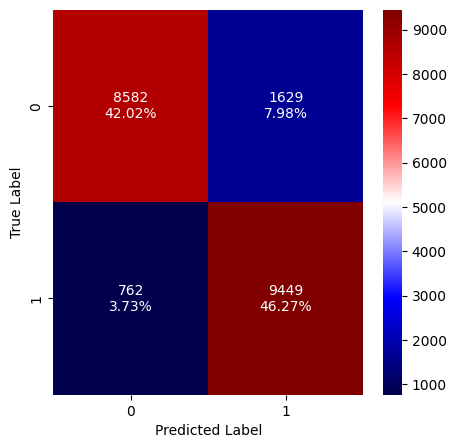

In [169]:
plot_confusion_matrix(xg_model_over, X_train_over, y_train_over)

# Undersampling

In [170]:
rus= RandomUnderSampler(random_state=42, sampling_strategy=1)
X_train_under, y_train_under= rus.fit_resample(X_train, y_train)

In [171]:
print("Before Undersampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Certified': {}".format(sum(y_train_under == 1)))
print("After Undersampling, counts of label 'Denied': {} \n".format(sum(y_train_under == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Undersampling, counts of label 'Certified': 10211
Before Undersampling, counts of label 'Denied': 5077 

After Undersampling, counts of label 'Certified': 5077
After Undersampling, counts of label 'Denied': 5077 

After Undersampling, the shape of train_X: (10154, 21)
After Undersampling, the shape of train_y: (10154,) 



## Decision Tree UnderSampled

In [172]:
dt_model_under= DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dt_model_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [173]:
y_train_under_predict= dt_model_under.predict(X_train_under)
# y_val_predict= dt_model_under.predict(X_val)

In [174]:
model_score= dt_model_under.score(X_train_under, y_train_under)
print(model_score)

1.0


In [175]:
print(classification_report(y_train_under, y_train_under_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5077
         1.0       1.00      1.00      1.00      5077

    accuracy                           1.00     10154
   macro avg       1.00      1.00      1.00     10154
weighted avg       1.00      1.00      1.00     10154



In [176]:
# print(classification_report(y_val, y_val_predict))

In [177]:
model_performance(dt_model_under, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [178]:
# model_performance(dt_model_under, X_val, y_val)

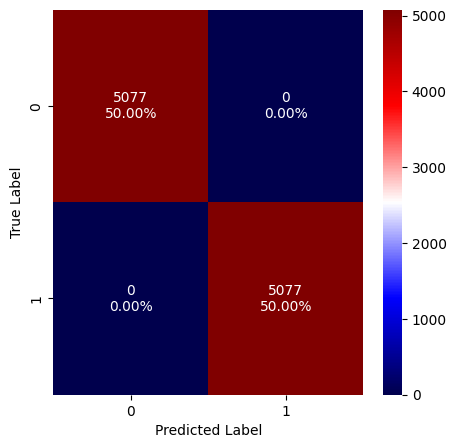

In [179]:
plot_confusion_matrix(dt_model_under, X_train_under, y_train_under)

In [180]:
# plot_confusion_matrix(dt_model_under, X_val, y_val)

## Radom Forest UnderSampled

In [181]:
rf_model_under= RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_under.fit(X_train_under, y_train_under)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [182]:
model_score= rf_model_under.score(X_train_under, y_train_under)
print(model_score)

1.0


In [183]:
y_train_under_predict= rf_model_under.predict(X_train_under)
# y_val_predict= rf_model_under.predict(X_val)

In [184]:
print(classification_report(y_train_under, y_train_under_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5077
         1.0       1.00      1.00      1.00      5077

    accuracy                           1.00     10154
   macro avg       1.00      1.00      1.00     10154
weighted avg       1.00      1.00      1.00     10154



In [185]:
# print(classification_report(y_val, y_val_predict))

In [186]:
model_performance(rf_model_under, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [187]:
# model_performance(rf_model_under, X_val, y_val)

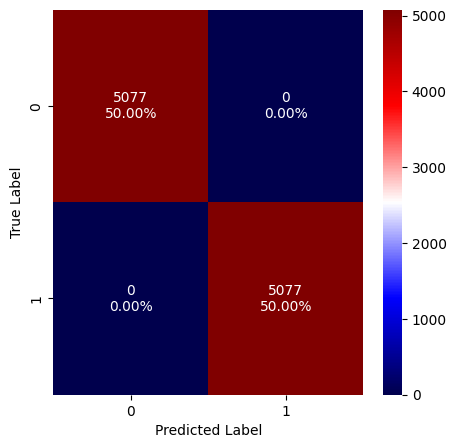

In [188]:
plot_confusion_matrix(rf_model_under, X_train_under, y_train_under)

In [189]:
# plot_confusion_matrix(rf_model_under, X_val, y_val)

## Bagging UnderSampled

In [190]:
bg_model_under= BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42)
bg_model_under.fit(X_train_under, y_train_under)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  random_state=42)

In [191]:
model_score= bg_model_under.score(X_train_under, y_train_under)
print(model_score)

0.979515461886941


In [192]:
y_train_under_predict= bg_model_under.predict(X_train_under)
# y_val_predict= bg_model_under.predict(X_val)

In [193]:
print(classification_report(y_train_under, y_train_under_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5077
         1.0       0.99      0.97      0.98      5077

    accuracy                           0.98     10154
   macro avg       0.98      0.98      0.98     10154
weighted avg       0.98      0.98      0.98     10154



In [194]:
# print(classification_report(y_val, y_val_predict))

In [195]:
model_performance(bg_model_under, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.979515,0.967697,0.991124,0.97927


In [196]:
# model_performance(bg_model_under, X_val, y_val)

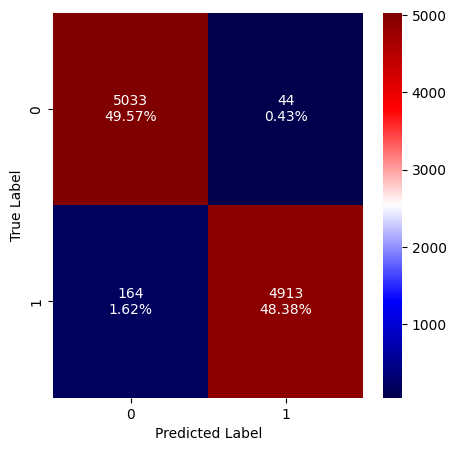

In [197]:
plot_confusion_matrix(bg_model_under, X_train_under, y_train_under)

In [198]:
# plot_confusion_matrix(bg_model_under, X_val, y_val)

## AdaBoost UnderSampled

In [199]:
ad_model_under= AdaBoostClassifier(random_state=42)
ad_model_under.fit(X_train_under, y_train_under)

AdaBoostClassifier(random_state=42)

In [200]:
model_score= ad_model_under.score(X_train_under, y_train_under)
print(model_score)

0.6910577112467993


In [201]:
y_train_under_predict= ad_model_under.predict(X_train_under)
# y_val_predict= ad_model_under.predict(X_val)

In [202]:
print(classification_report(y_train_under, y_train_under_predict))

              precision    recall  f1-score   support

         0.0       0.71      0.64      0.68      5077
         1.0       0.67      0.74      0.71      5077

    accuracy                           0.69     10154
   macro avg       0.69      0.69      0.69     10154
weighted avg       0.69      0.69      0.69     10154



In [203]:
# print(classification_report(y_val, y_val_predict))

In [204]:
model_performance(ad_model_under, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.691058,0.739807,0.674085,0.705418


In [205]:
# model_performance(ad_model_under, X_val, y_val)

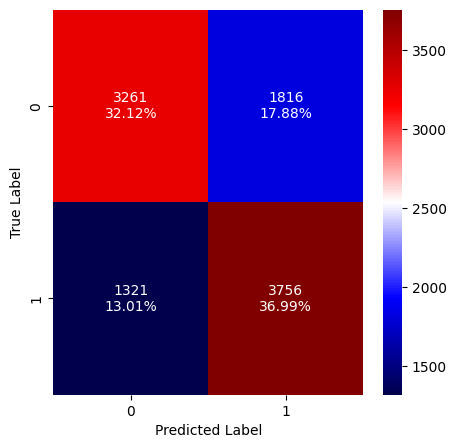

In [206]:
plot_confusion_matrix(ad_model_under, X_train_under, y_train_under)

In [207]:
# plot_confusion_matrix(ad_model_under, X_val, y_val)

## XG Boosting UnderSampled

In [208]:
xg_model_under= XGBClassifier(random_state=42)
xg_model_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [209]:
model_score= xg_model_under.score(X_train_under, y_train_under)
print(model_score)

0.867835335828245


In [210]:
y_train_under_predict= xg_model_under.predict(X_train_under)
# y_val_predict= xg_model_under.predict(X_val)

In [211]:
print(classification_report(y_train_under, y_train_under_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      5077
         1.0       0.87      0.87      0.87      5077

    accuracy                           0.87     10154
   macro avg       0.87      0.87      0.87     10154
weighted avg       0.87      0.87      0.87     10154



In [212]:
# print(classification_report(y_val, y_val_predict))

In [213]:
model_performance(xg_model_under, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.867835,0.866457,0.868852,0.867653


In [214]:
# model_performance(xg_model_under, X_val, y_val)

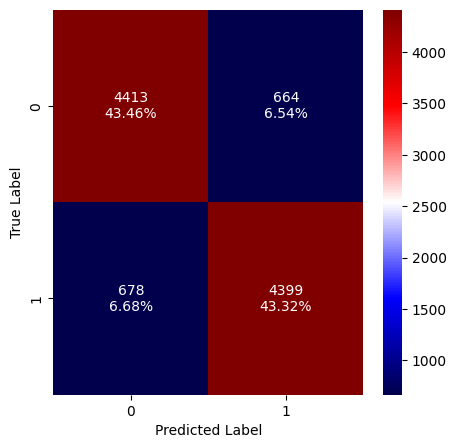

In [215]:
plot_confusion_matrix(xg_model_under, X_train_under, y_train_under)

In [216]:
# plot_confusion_matrix(xg_model_under, X_val, y_val)

#Hyperparameter Tuning

## Random Forest

In [217]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [218]:
%%time
rf= RandomForestClassifier(random_state=42)

parameters= {
    'n_estimators': [75,100,125],
    'min_samples_leaf': np.arange(5,10),
    'max_features': np.arange(0.2,0.9,0.1),
    'max_samples': np.arange(0.2,0.9,0.1),
    'max_depth': np.arange(2,5,1),
    'class_weight': ['balanced'],
    'min_impurity_decrease':[.001,.002,.003]
}
scorer= metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=rf, param_distributions=parameters, n_iter=40, scoring=scorer, cv=5, random_state=42, n_jobs = -1)
randomized_cv.fit(X_train_under, y_train_under)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'min_samples_leaf': np.int64(7), 'min_impurity_decrease': 0.003, 'max_samples': np.float64(0.2), 'max_features': np.float64(0.30000000000000004), 'max_depth': np.int64(3), 'class_weight': 'balanced'} with CV score=0.7205841370752535:
CPU times: user 1.88 s, sys: 211 ms, total: 2.09 s
Wall time: 1min 25s


In [219]:
randomized_cv.best_params_

{'n_estimators': 125,
 'min_samples_leaf': np.int64(7),
 'min_impurity_decrease': 0.003,
 'max_samples': np.float64(0.2),
 'max_features': np.float64(0.30000000000000004),
 'max_depth': np.int64(3),
 'class_weight': 'balanced'}

In [220]:
randomized_cv.best_score_

np.float64(0.7205841370752535)

In [221]:
rf_model_tuned= RandomForestClassifier( random_state=42,
                                       n_estimators=125,
                                       min_samples_leaf= 7,
                                        min_impurity_decrease = 0.003,
                                        max_samples= 0.3000000000000001,
                                        max_features= 0.2,
                                        max_depth= 3,
                                        class_weight= 'balanced')

In [222]:
rf_model_tuned.fit(X_train_under, y_train_under)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.3000000000000001,
                       min_impurity_decrease=0.003, min_samples_leaf=7,
                       n_estimators=125, random_state=42)

In [223]:
model_score= rf_model_tuned.score(X_train_under, y_train_under)
print(model_score)

0.694406145361434


In [224]:
y_train_tuned_predict= rf_model_tuned.predict(X_train_under)
y_val_predict= rf_model_tuned.predict(X_val)

In [225]:
print(classification_report(y_train_under, y_train_tuned_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.60      0.66      5077
         1.0       0.66      0.79      0.72      5077

    accuracy                           0.69     10154
   macro avg       0.70      0.69      0.69     10154
weighted avg       0.70      0.69      0.69     10154



In [226]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

         0.0       0.58      0.59      0.58      1693
         1.0       0.79      0.79      0.79      3403

    accuracy                           0.72      5096
   macro avg       0.69      0.69      0.69      5096
weighted avg       0.72      0.72      0.72      5096



In [227]:
model_performance(rf_model_tuned, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.694406,0.786488,0.664172,0.720173


In [228]:
model_performance(rf_model_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1_score
0,0.723116,0.791654,0.793286,0.792469


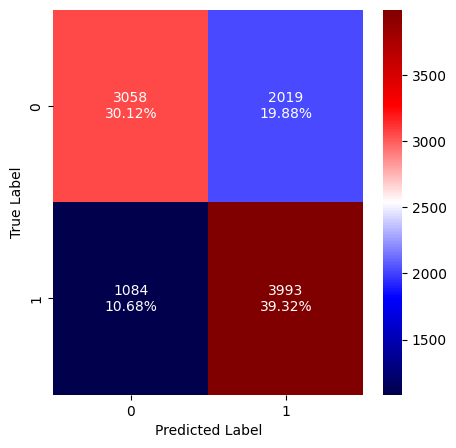

In [229]:
plot_confusion_matrix(rf_model_tuned, X_train_under, y_train_under)

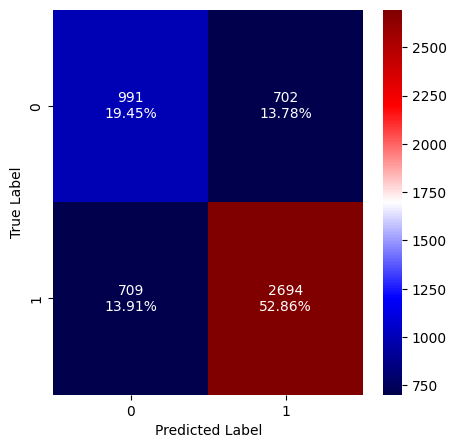

In [230]:
plot_confusion_matrix(rf_model_tuned, X_val, y_val)

## Decision Tree

In [231]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [232]:
%%time
dt= DecisionTreeClassifier(class_weight='balanced', random_state=42,criterion='gini')
parameters={
    'max_depth': np.arange(15,50,5),
    'max_leaf_nodes':[10,15,20,25,18],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf': np.arange(1,10,1)
}

scorer= metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=dt, param_distributions=parameters, n_iter=40, scoring=scorer, cv=5, random_state=42, n_jobs = -1)
randomized_cv.fit(X_train_under, y_train_under)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_split': 8, 'min_samples_leaf': np.int64(1), 'max_leaf_nodes': 15, 'max_depth': np.int64(40)} with CV score=0.7287184079091484:
CPU times: user 619 ms, sys: 65.3 ms, total: 684 ms
Wall time: 7.04 s


In [233]:
randomized_cv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': np.int64(1),
 'max_leaf_nodes': 15,
 'max_depth': np.int64(40)}

In [234]:
randomized_cv.best_score_

np.float64(0.7287184079091484)

In [235]:
dt_model_tuned= DecisionTreeClassifier(class_weight='balanced',
                                       random_state=42,
                                       criterion='gini',
                                       min_samples_split= 8,
                                       min_samples_leaf= 1,
                                       max_leaf_nodes=15,
                                       max_depth=40)

In [236]:
dt_model_tuned.fit(X_train_under,y_train_under)

DecisionTreeClassifier(class_weight='balanced', max_depth=40, max_leaf_nodes=15,
                       min_samples_split=8, random_state=42)

In [237]:
y_train_tuned_predict= dt_model_tuned.predict(X_train_under)
y_val_predict= dt_model_tuned.predict(X_val)

In [238]:
print(classification_report(y_train_under, y_train_tuned_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.61      0.68      5077
         1.0       0.67      0.80      0.73      5077

    accuracy                           0.71     10154
   macro avg       0.71      0.71      0.70     10154
weighted avg       0.71      0.71      0.70     10154



In [239]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      1693
         1.0       0.80      0.80      0.80      3403

    accuracy                           0.73      5096
   macro avg       0.69      0.70      0.69      5096
weighted avg       0.73      0.73      0.73      5096



In [240]:
model_performance(dt_model_tuned, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.705929,0.799094,0.673585,0.730991


In [241]:
model_performance(rf_model_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1_score
0,0.723116,0.791654,0.793286,0.792469


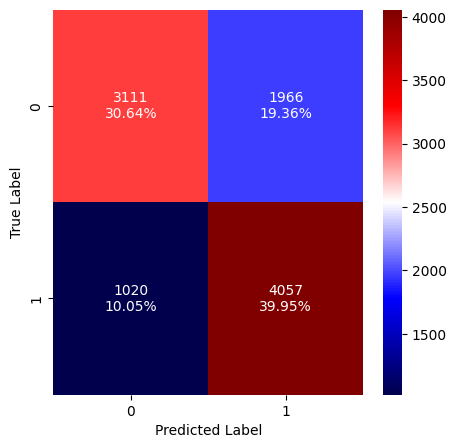

In [242]:
plot_confusion_matrix(dt_model_tuned, X_train_under, y_train_under)

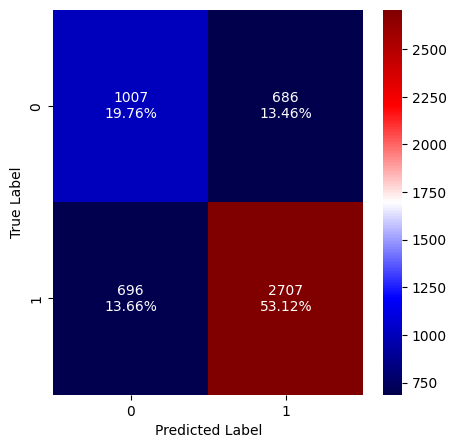

In [243]:
plot_confusion_matrix(dt_model_tuned, X_val, y_val)

## XG Boosting UnderSampled

In [244]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [245]:
%%time
xgb= XGBClassifier(random_state=42)
parameters={
    'n_estimators': [75,100,125],
    'subsample': [0.7,0.8,0.9,1],
    'gamma':[0,1,3,5],
    'max_depth': [5,7,10,15],
    'learning_rate':[0.1,0.01]
}
scorer= metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, n_iter=40, scoring=scorer, cv=5, random_state=42, n_jobs = -1)
randomized_cv.fit(X_train_under, y_train_under)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 75, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.7249008507470686:
CPU times: user 1.73 s, sys: 174 ms, total: 1.91 s
Wall time: 1min 9s


In [246]:
randomized_cv.best_params_

{'subsample': 1,
 'n_estimators': 75,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 5}

In [247]:
randomized_cv.best_score_

np.float64(0.7249008507470686)

In [248]:
xg_model_tuned= XGBClassifier(random_state=42,
                              subsample=1,
                              n_estimators=75,
                              max_depth=15,
                              learning_rate=0.1,
                              gamma=5)

In [249]:
xg_model_tuned.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, ...)

In [250]:
model_score= xg_model_tuned.score(X_train_under, y_train_under)
print(model_score)

0.7278904865077802


In [251]:
y_train_tuned_predict= xg_model_tuned.predict(X_train_under)
y_val_predict= xg_model_tuned.predict(X_val)

In [252]:
print(classification_report(y_train_under, y_train_tuned_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      5077
         1.0       0.71      0.77      0.74      5077

    accuracy                           0.73     10154
   macro avg       0.73      0.73      0.73     10154
weighted avg       0.73      0.73      0.73     10154



In [253]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

         0.0       0.57      0.65      0.61      1693
         1.0       0.81      0.76      0.79      3403

    accuracy                           0.72      5096
   macro avg       0.69      0.71      0.70      5096
weighted avg       0.73      0.72      0.73      5096



In [254]:
model_performance(xg_model_tuned, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1_score
0,0.72789,0.768761,0.71067,0.738575


In [255]:
model_performance(xg_model_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1_score
0,0.723901,0.759624,0.81443,0.786073


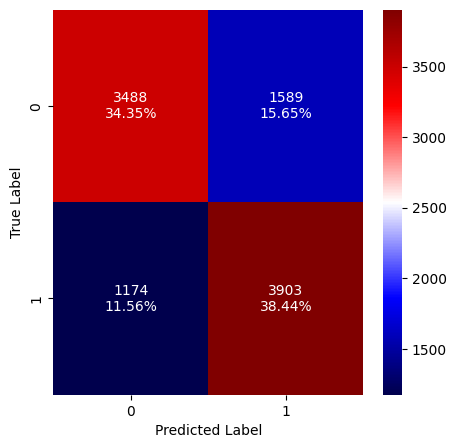

In [256]:
plot_confusion_matrix(xg_model_tuned, X_train_under, y_train_under)

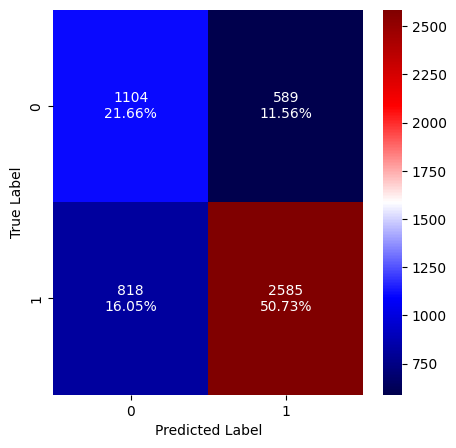

In [257]:
plot_confusion_matrix(xg_model_tuned, X_val, y_val)

## XGB Oversampled

In [258]:
%%time
xgb= XGBClassifier(random_state=42)
parameters={
    'n_estimators': [75,100,125],
    'subsample': [0.7,0.8,0.9,1],
    'gamma':[0,1,3,5],
    'max_depth': [5,7,10,15],
    'learning_rate':[0.1,0.01]
}
scorer= metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, n_iter=40, scoring=scorer, cv=5, random_state=42, n_jobs = -1)
randomized_cv.fit(X_train_over, y_train_over)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8188104982710372:
CPU times: user 3.52 s, sys: 418 ms, total: 3.94 s
Wall time: 4min 36s


In [259]:
randomized_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 125,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 5}

In [260]:
randomized_cv.best_score_

np.float64(0.8188104982710372)

In [261]:
xg_model_tuned2= XGBClassifier(random_state=42,
                              subsample=0.7,
                              n_estimators=125,
                              max_depth=15,
                              learning_rate=0.1,
                              gamma=5)

In [262]:
xg_model_tuned2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=None, num_parallel_tree=None, ...)

In [263]:
model_score= xg_model_tuned2.score(X_train_over, y_train_over)
print(model_score)

0.8224953481539516


In [264]:
y_train_tuned_predict= xg_model_tuned2.predict(X_train_over)
y_val_predict= xg_model_tuned2.predict(X_val)

In [265]:
print(classification_report(y_train_over, y_train_tuned_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81     10211
         1.0       0.79      0.87      0.83     10211

    accuracy                           0.82     20422
   macro avg       0.83      0.82      0.82     20422
weighted avg       0.83      0.82      0.82     20422



In [266]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58      1693
         1.0       0.78      0.86      0.82      3403

    accuracy                           0.75      5096
   macro avg       0.72      0.69      0.70      5096
weighted avg       0.74      0.75      0.74      5096



In [267]:
model_performance(xg_model_tuned2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1_score
0,0.822495,0.872099,0.793389,0.830884


In [268]:
model_performance(xg_model_tuned2, X_val, y_val)

,Accuracy,Recall,Precision,F1_score
0,0.748626,0.864531,0.782031,0.821214


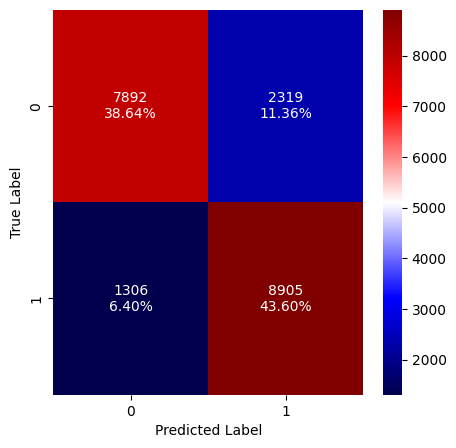

In [269]:
plot_confusion_matrix(xg_model_tuned2, X_train_over, y_train_over)

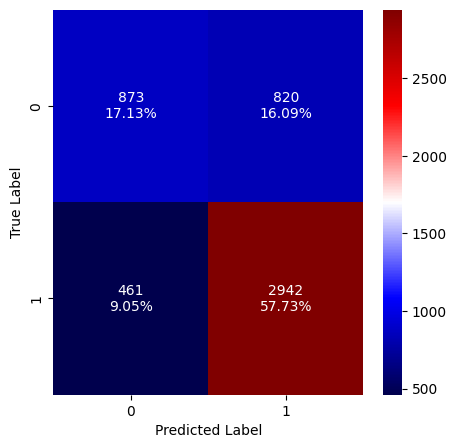

In [270]:
plot_confusion_matrix(xg_model_tuned2, X_val, y_val)

In [271]:
model_performance(xg_model_tuned2, X_test, y_test)

,Accuracy,Recall,Precision,F1_score
0,0.742151,0.861046,0.777041,0.81689


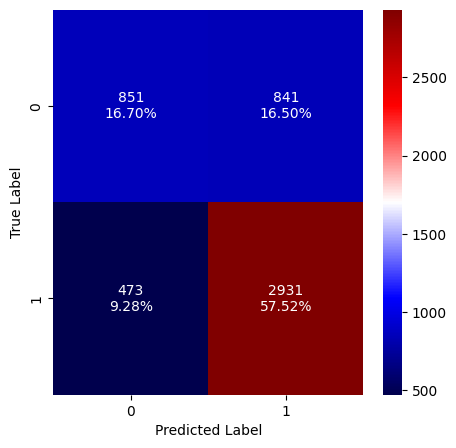

In [272]:
plot_confusion_matrix(xg_model_tuned2, X_test, y_test)

In [275]:
print(pd.DataFrame(xg_model_tuned2.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp', ascending= False))

                                        Imp
education_of_employee_High School  0.316520
has_job_experience_Y               0.240818
education_of_employee_Master's     0.054647
unit_of_wage_Year                  0.053600
region_of_employment_South         0.048859
continent_Europe                   0.043927
region_of_employment_Midwest       0.033994
education_of_employee_Doctorate    0.026426
region_of_employment_Northeast     0.022760
continent_Asia                     0.020160
region_of_employment_West          0.019990
full_time_position_Y               0.018255
continent_North America            0.015860
prevailing_wage                    0.012524
requires_job_training_Y            0.012223
continent_South America            0.010573
unit_of_wage_Month                 0.010398
no_of_employees                    0.010268
unit_of_wage_Week                  0.009955
yr_of_estab                        0.009935
continent_Oceania                  0.008310


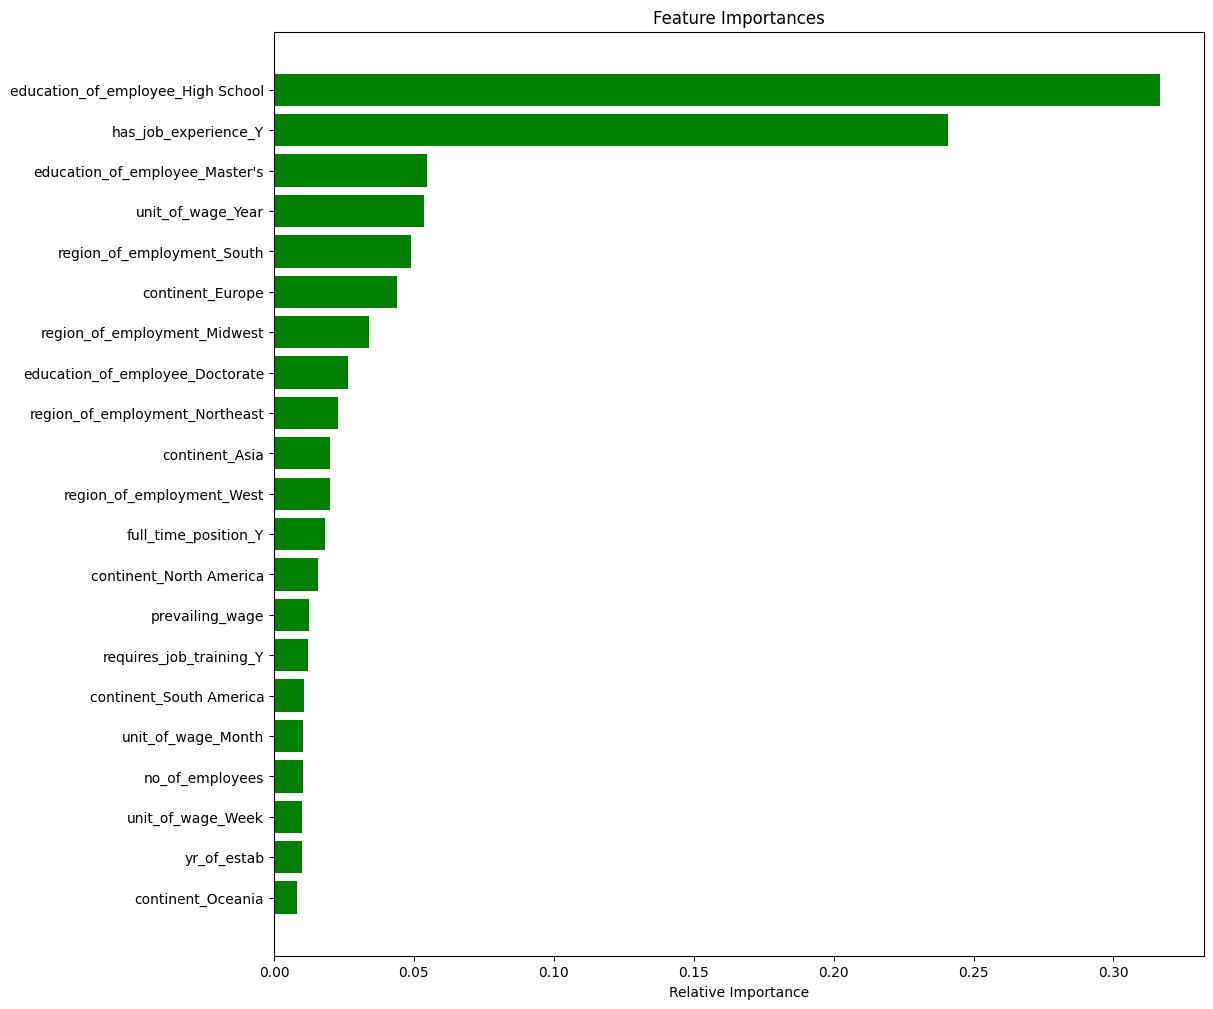

In [276]:
feature_names = X_train.columns
importances = xg_model_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()